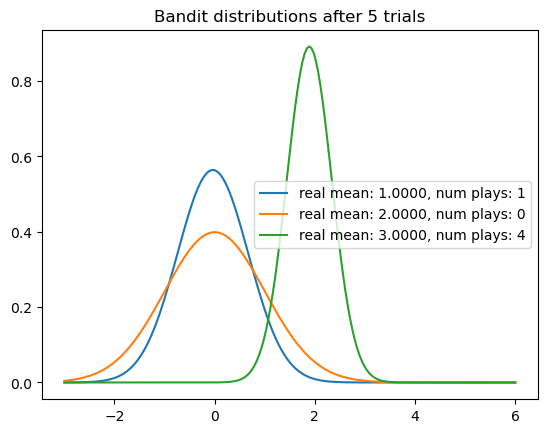

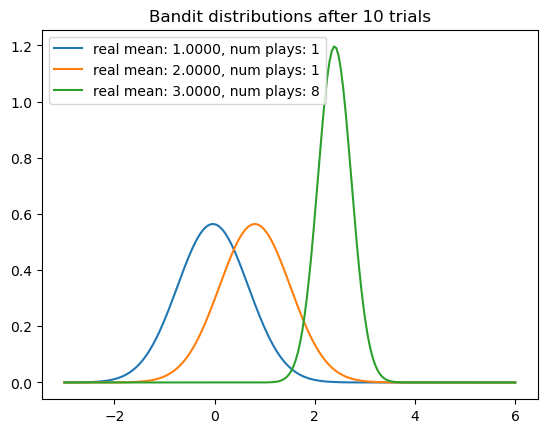

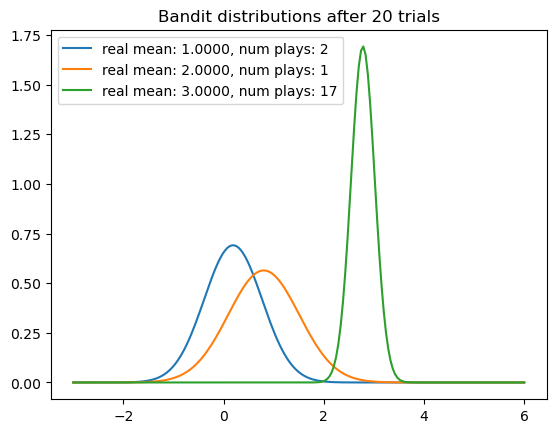

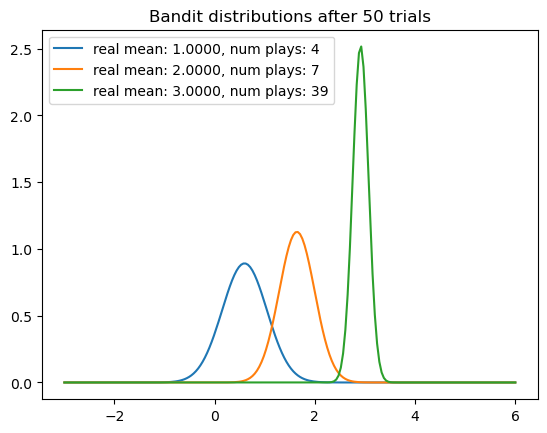

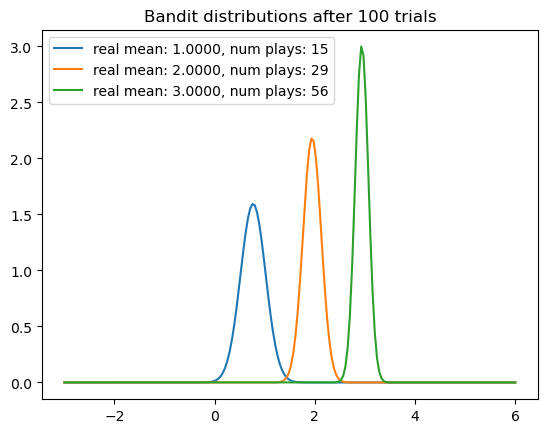

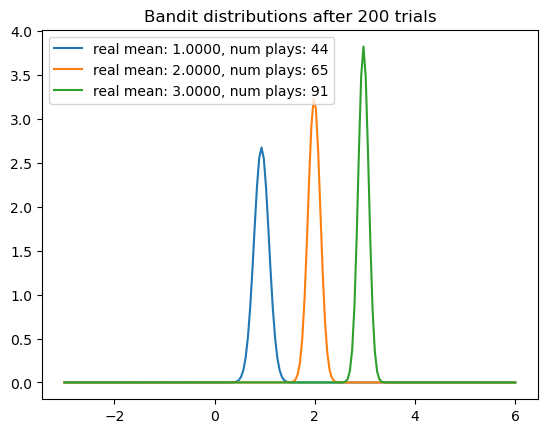

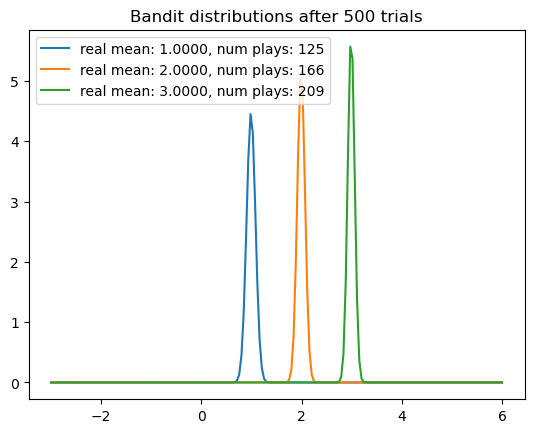

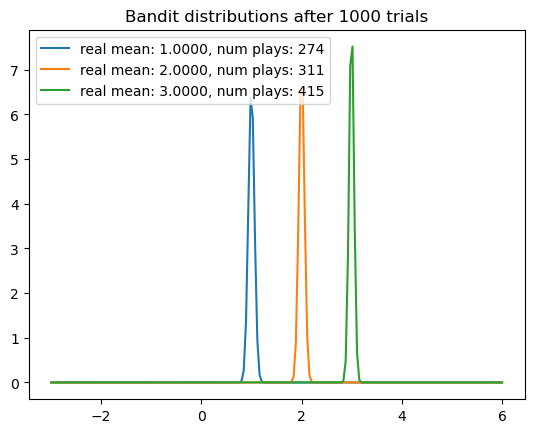

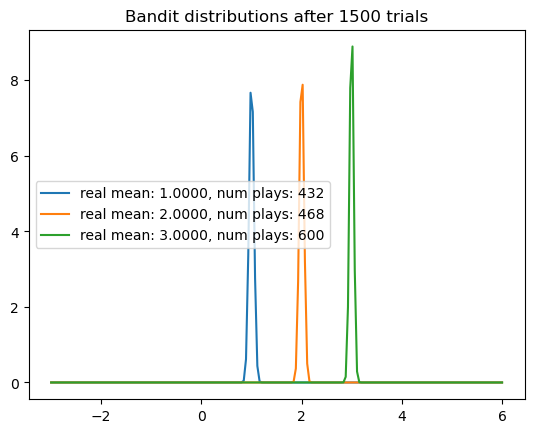

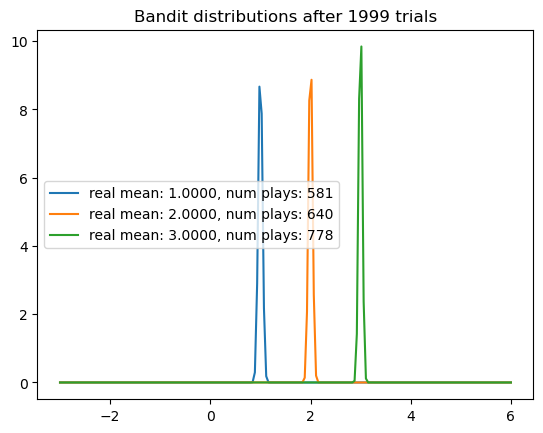

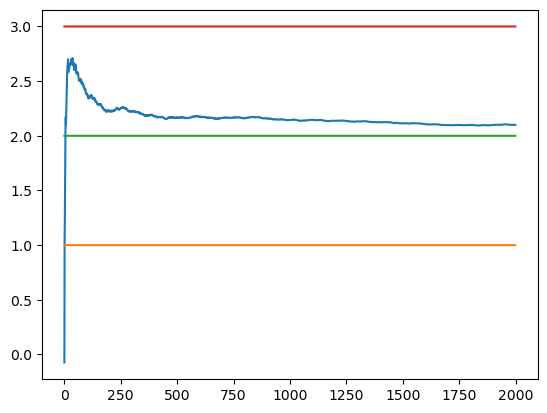

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

def pull_bandit(true_mean, tau):
    return np.random.randn() / np.sqrt(tau) + true_mean

def sample_posterior(m, lambda_):
    return np.random.randn() / np.sqrt(1. / lambda_) + m

def update_params(m, lambda_, tau, x):
    new_m = (tau * x + lambda_ * m) / (tau + lambda_)
    new_lambda_ = lambda_ + tau
    return new_m, new_lambda_

def plot_bandit_distributions(bandits, trial):
    x = np.linspace(-3, 6, 200)
    for true_mean, m, lambda_, N in bandits:
        y = norm.pdf(x, m, np.sqrt(1. / lambda_))
        plt.plot(x, y, label=f"real mean: {true_mean:.4f}, num plays: {N}")
    plt.title(f"Bandit distributions after {trial} trials")
    plt.legend()
    plt.show()

def run_experiment():
    bandits = [(m, 0, 1, 0) for m in BANDIT_MEANS]

    sample_points = [5, 10, 20, 50, 100, 200, 500, 1000, 1500, 1999]
    rewards = np.empty(NUM_TRIALS)

    for i in range(NUM_TRIALS):
        # Thompson sampling
        j = np.argmax([sample_posterior(m, lambda_) for _, m, lambda_, _ in bandits])

        # plot the posteriors
        if i in sample_points:
            plot_bandit_distributions(bandits, i)

        # pull the arm for the bandit with the largest sample
        true_mean, m, lambda_, _ = bandits[j]
        x = pull_bandit(true_mean, lambda_)

        # update the distribution for the bandit whose arm we just pulled
        new_m, new_lambda_ = update_params(m, lambda_, 1, x)
        bandits[j] = (true_mean, new_m, new_lambda_, bandits[j][3] + 1)

        # update rewards
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    for m in BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS) * m)
    plt.show()

if __name__ == '__main__':
    run_experiment()


Import Statements:

The code begins with import statements to bring in necessary libraries, including NumPy for numerical operations, Matplotlib for plotting, and SciPy's norm distribution for normal distributions.
Constants and Parameters:

NUM_TRIALS: The number of trials or time steps in the bandit problem.
BANDIT_MEANS: A list that defines the true mean rewards for each bandit arm. In this example, there are three arms with true mean rewards of 1, 2, and 3.
Functions:

pull_bandit(true_mean, tau): Simulates pulling a bandit arm with a given true mean reward true_mean and precision parameter tau. It returns a reward sampled from a normal distribution.
sample_posterior(m, lambda_): Samples from the posterior distribution of a bandit's mean reward. It takes the current mean m and precision lambda_ as parameters.
update_params(m, lambda_, tau, x): Updates the parameters of the posterior distribution for a bandit after observing reward x. It returns the new mean and precision.
plot_bandit_distributions(bandits, trial): Plots the posterior distributions of bandits to visualize their uncertainty after a certain number of trials.
Main Function - run_experiment():

Initializes a list of bandits, where each bandit is represented as a tuple containing the true mean reward, current mean, current precision (for the posterior distribution), and the number of times the bandit has been played.
Experiment Loop:

The main experiment loop runs for NUM_TRIALS iterations.
Inside the loop:
Thompson Sampling is used to select the arm with the highest sample from the posterior distribution of each bandit.
If the current trial number is in sample_points, the code plots the posterior distributions of all bandits to visualize their uncertainty.
The selected arm is pulled, and the observed reward is stored.
The parameters of the posterior distribution for the selected bandit are updated based on the observed reward.
The number of plays for the selected bandit is incremented.
Results:

After the experiment loop, the code computes the cumulative average reward and plots it along with the true mean rewards for each bandit arm.
Running the Experiment:

The code checks if it is being run as the main script (if __name__ == '__main__':) and calls the run_experiment() function to run the Thompson Sampling algorithm on the bandit problem.
Thompson Sampling is a Bayesian approach that maintains posterior distributions for each bandit arm's mean reward. It balances exploration and exploitation by selecting arms with higher samples from their respective posterior distributions. The code provides visualizations of the posterior distributions to show how the algorithm updates its beliefs about the bandits over time.